<a href="https://colab.research.google.com/github/insomaniac2k2/Dog-Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

# Get our workspace ready
* Import tensorflow
* Import tensorflow hub
* Get our GPU ready

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
tf.__version__, hub.__version__

('2.12.0', '0.13.0')

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Turning data into tensors


In [5]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

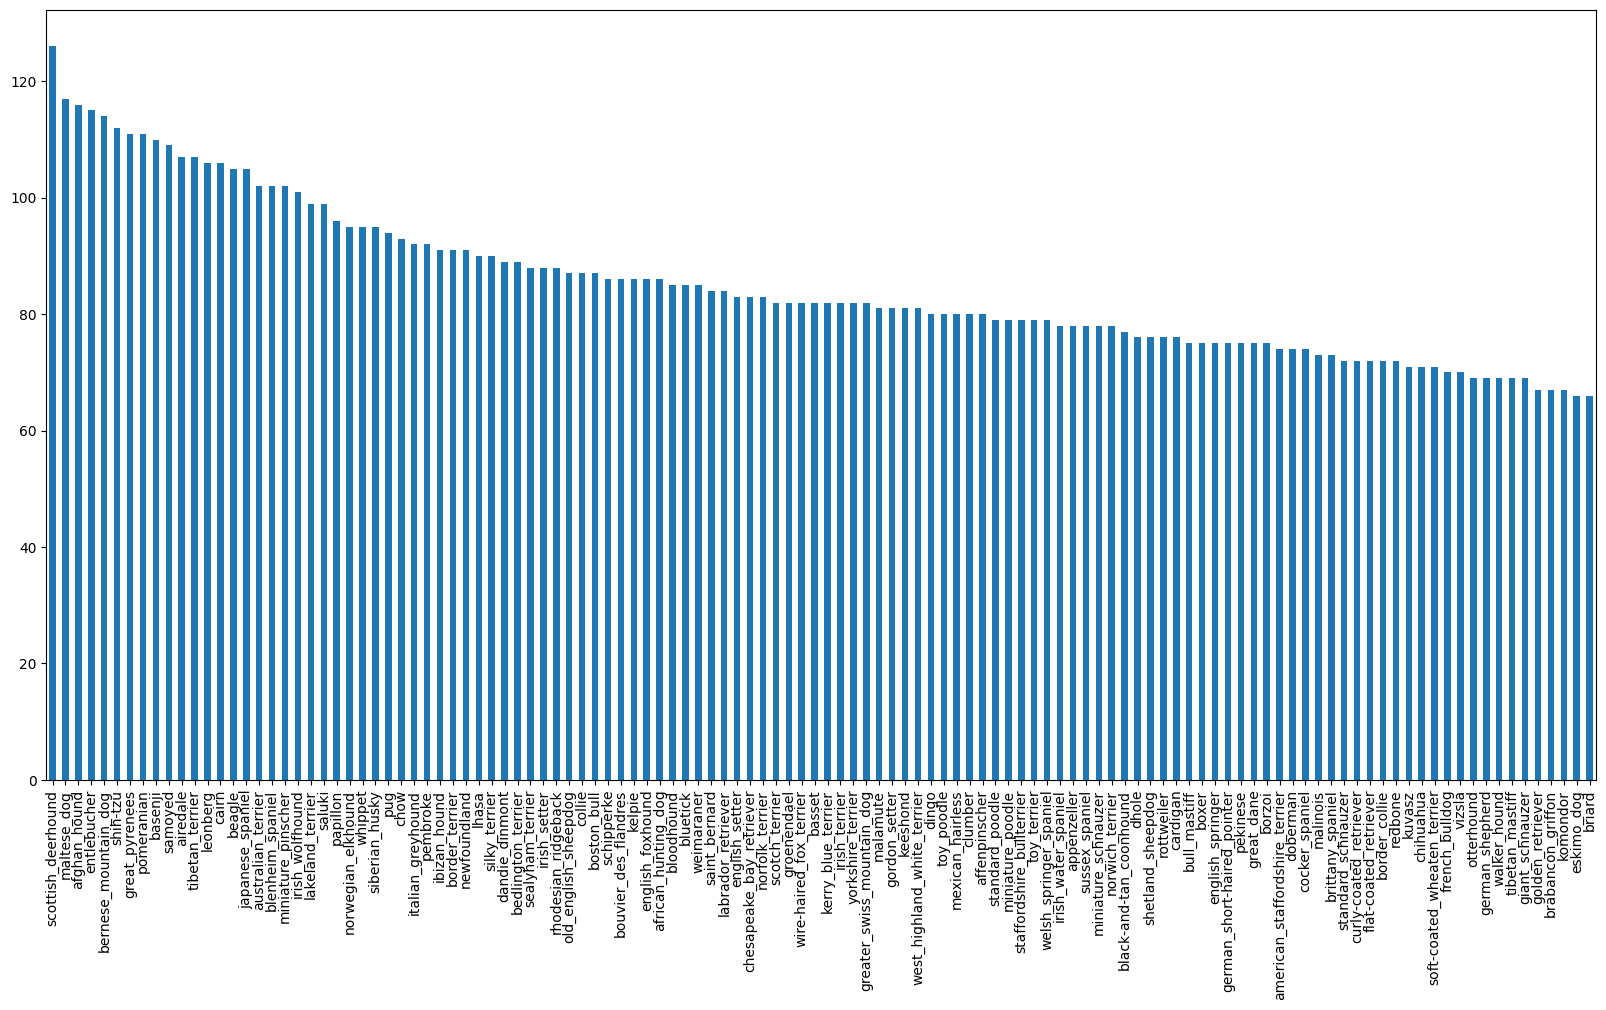

In [7]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

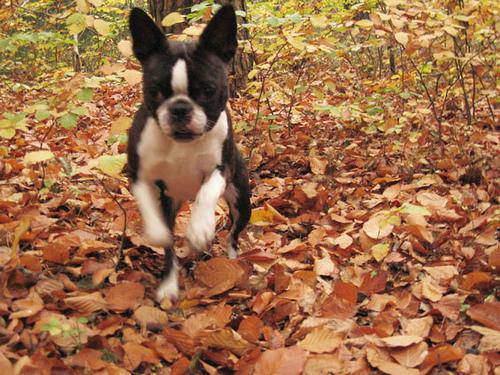

In [8]:
from IPython.display import display, Image
Image("/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

In [9]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
filenames = ["/content/drive/MyDrive/Dog Vision/train/" + fname +".jpg" for fname in labels_csv["id"]]

In [11]:
filenames[:10]

['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
import os
len(os.listdir("/content/drive/MyDrive/Dog Vision/train/")) == len(filenames)

True

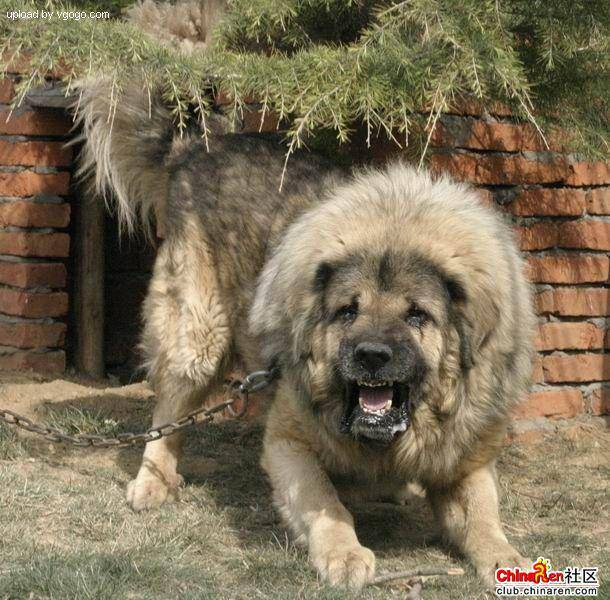

In [13]:
Image(filenames[9000])

In [14]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [15]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(labels)

10222

In [17]:
len(labels) == len(filenames)

True

In [18]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [19]:
# Turn a single label into boolean array
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
# Turn every label into a boolen array
boolean_labels = [label == unique_breeds for label in labels ]

In [21]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [23]:
# Truning boolen array into integers
print(labels[0]) # original labels
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occours
print(boolean_labels[0].argmax()) #index where label occours in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where sample label occours

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
print(labels[2]) # original labels
print(boolean_labels[2].astype(int)) #there will be a 1 where sample label occours

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [25]:
# Setup X & y
X = filenames
y = boolean_labels

In [26]:
len(filenames)

10222

We're going to start off with experimenting with ~1000 images and increase as needed

In [27]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10222, step:1000}

In [30]:
#  Split into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2, 
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [31]:
X_train[:5], y_train[:5]

(['/content/drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

## Preprocessing (Turning images to Tensors)

1. Take image as input
2. Use tensorflow to read file and save it to a variable
3. Turn our image into tensors
4. Normalize our image
5. Resize the image to be a shape of(224, 224)
6. Return the modified image



In [32]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [33]:
filenames[42]

'/content/drive/MyDrive/Dog Vision/train/011e06760794850c40f23d6426c40774.jpg'

In [34]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [36]:
# Turn image into tensors
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [37]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 color channels (R,G,B)
  image = tf.image.decode_jpeg(image, channels = 3)

  #Covert the color channels into 0-1 values from 0-255
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize our image
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches 


In [38]:
# Create fun to return a tuple
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [39]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Turn all of our data into batches

In [41]:
# Define batchsize
BATCH_SIZE = 32

# Create a function
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(x) and label(y) pairs.
  Shuffles the data if it's training data but doesn.t shuffle if it's validation data
  Also accepts test data as input
  """

  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
    return data_batch

In [42]:
# Create training and validation
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [43]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing the Data batches

In [50]:
import matplotlib.pyplot as plt
# Function for viewing images in a data batch
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [51]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [52]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[9.37254965e-01, 1.00000000e+00, 9.72549081e-01],
          [9.28168833e-01, 9.96971309e-01, 9.48319376e-01],
          [9.35224175e-01, 9.91211534e-01, 9.41176534e-01],
          ...,
          [9.35906708e-01, 1.00000000e+00, 9.68487740e-01],
          [9.52941239e-01, 9.99107182e-01, 9.44555402e-01],
          [9.52941239e-01, 9.96078491e-01, 9.29411829e-01]],
 
         [[8.99168491e-01, 9.65922654e-01, 9.20430720e-01],
          [8.96274984e-01, 9.64442134e-01, 9.08586323e-01],
          [9.21326518e-01, 9.75309372e-01, 9.18777466e-01],
          ...,
          [9.44685519e-01, 1.00000000e+00, 9.68765080e-01],
          [9.57030952e-01, 9.94543314e-01, 9.42175090e-01],
          [9.36904848e-01, 9.76032972e-01, 9.05357182e-01]],
 
         [[8.67830932e-01, 9.35513020e-01, 8.67682159e-01],
          [8.70298505e-01, 9.34390783e-01, 8.67121041e-01],
          [9.14649248e-01, 9.62180674e-01, 8.97330582e-01],
          ...,
          [9.36924994e-01, 9.82491493e-01, 9.4743

In [53]:
unique_breeds[y[0].argmax()]

'boston_bull'

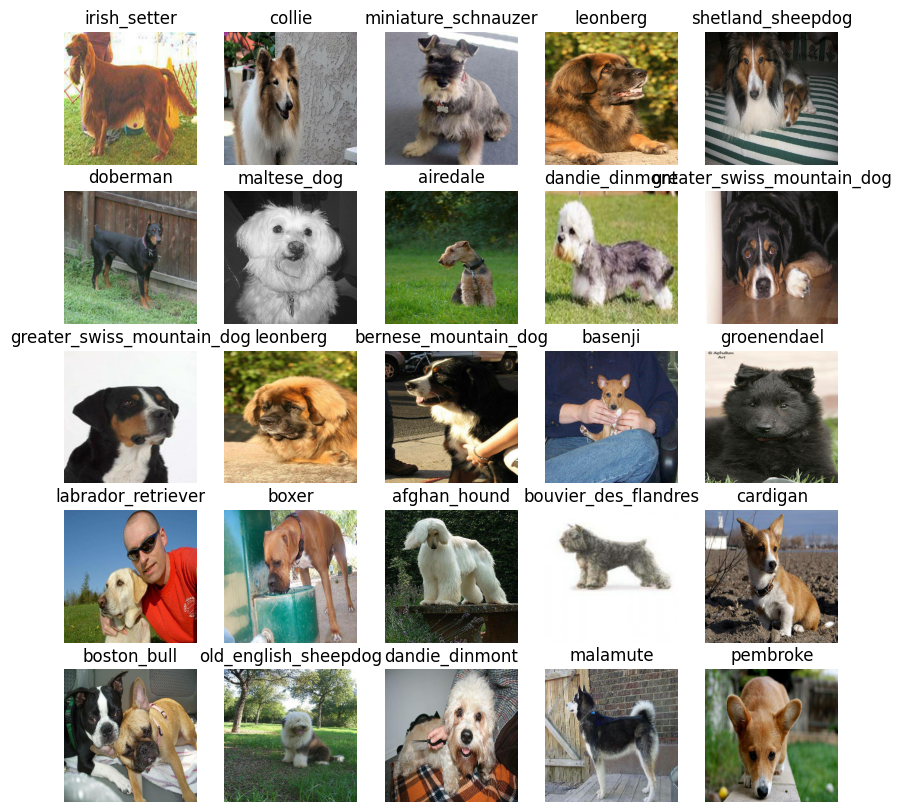

In [54]:
show_25_images(train_images, train_labels)

## Building a model
Before building the model we need to define:
* The input shape to our model.
* The output shape of our model.
* The URL of the model.

In [55]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)

#Setup model url from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Create a function which:
* Takes input shape, output shape and the model.
* Defines the layers in the Keras model in sequeential fashion.
* Compiles the model.
* Build the model.
* Returns the model.

In [56]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
        hub.KerasLayer(model_url),
        tf.keras.layers.Dense(units = output_shape,
                              activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build the model
  model.build(input_shape)

  return model

In [57]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating Callbacks
We create two callbacks:
* Tensorboard
* Early stopping

### Tensorboard Callback
To setup tensorboard callback:
1. Load the Tensorboard notebook extension.
2. Create a tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs

In [60]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [61]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early stopping callback

Stops the model from overfitting

In [62]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 patience = 3)

## Training our model(on a subset of data)

In [63]:
NUM_EPOCHS = 50 #@param {type: "slider", min:10, max:100, step: 10}

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs
* Return the model

In [64]:
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq=1,
            callbacks = [tensorboard, earlystopping])
  return model

In [65]:
import tensorflow as tf
import tensorflow_hub as hub
savedmodel = tf.keras.models.load_model('/content/drive/MyDrive/Dog Vision/dog-vision-model.h5',
                                        custom_objects={"KerasLayer":hub.KerasLayer})
savedmodel.summary()
model = savedmodel

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [66]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 266s 10s/step - loss: 4.6230 - accuracy: 0.0962 - val_loss: 3.5250 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 4s 162ms/step - loss: 1.6901 - accuracy: 0.6775 - val_loss: 2.1872 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 3s 117ms/step - loss: 0.5838 - accuracy: 0.9388 - val_loss: 1.7399 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 3s 114ms/step - loss: 0.2573 - accuracy: 0.9850 - val_loss: 1.5281 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 4s 170ms/step - loss: 0.1506 - accuracy: 0.9975 - val_loss: 1.4460 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 3s 126ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 1.4110 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================

### Checking the TensorBoard logs

The tensorboard magic function (`%tensorboard`) will access the logs directory 

In [67]:
!kill 1272
%tensorboard --logdir /content/drive/MyDrive/Dog\ Vision/logs

/bin/bash: line 0: kill: (1272) - No such process


<IPython.core.display.Javascript object>

## Making and evaluating using a trained  model

In [68]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [69]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 45s 89ms/step


array([[2.95496592e-03, 3.62663181e-04, 2.14301306e-03, ...,
        1.52158857e-04, 5.75624617e-05, 4.49095340e-03],
       [7.65186851e-04, 1.94654451e-04, 3.23878159e-03, ...,
        1.41980534e-04, 3.45677021e-03, 3.04379879e-04],
       [5.05426942e-06, 4.11933834e-05, 5.40508445e-05, ...,
        1.21871735e-05, 2.38987013e-05, 8.37392945e-05],
       ...,
       [1.12242442e-05, 7.17303919e-05, 1.53160756e-04, ...,
        3.29695395e-05, 2.44660594e-04, 9.39438352e-04],
       [2.93946709e-03, 2.19878799e-04, 1.05860920e-04, ...,
        5.26848235e-05, 2.39838373e-05, 1.56788938e-02],
       [1.13899063e-03, 1.98650014e-04, 1.54358556e-03, ...,
        3.89980618e-03, 3.56445648e-03, 3.02024037e-05]], dtype=float32)

In [70]:
# First prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediction: {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[2.95496592e-03 3.62663181e-04 2.14301306e-03 1.60366239e-04
 2.23880459e-04 2.04672207e-04 4.71086577e-02 4.06676263e-04
 2.36710821e-05 6.09670649e-04 3.07326583e-04 3.09332390e-05
 1.23129561e-04 6.64152467e-05 2.22770526e-04 9.58330638e-04
 1.37567098e-04 1.96960062e-01 1.37572017e-04 5.54583130e-05
 7.56966590e-04 2.53899852e-05 1.37277857e-05 1.37759303e-03
 1.30745202e-05 1.01716876e-04 2.35504389e-01 1.46474398e-04
 9.19104612e-04 1.00879130e-04 9.04624831e-05 3.56740435e-04
 1.90615514e-03 2.04626722e-05 1.64386991e-04 5.48938848e-02
 8.75263049e-06 5.36421430e-04 4.64628920e-06 1.81231851e-04
 8.63512803e-04 2.04015450e-05 1.92701191e-04 3.46469576e-04
 1.29211003e-05 3.30370967e-04 4.93637635e-05 2.84509821e-04
 4.60866780e-04 8.91510063e-05 3.44076514e-04 5.74286714e-05
 6.26629393e-04 7.50860636e-05 9.10524177e-05 5.00470333e-06
 1.06048748e-04 1.49674993e-03 4.27330640e-04 1.11330897e-01
 3.67598899e-04 7.75590015e-05 1.63505564e-03 2.05535500e-04
 1.83375581e-04 1.036637

In [72]:
# Turn prediction probabilites into their respective label
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [73]:
def unbatchify(data):
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Lets visualize the predictions

In [74]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get pred label
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color ="green"
  else:
    color="red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
            color=color)

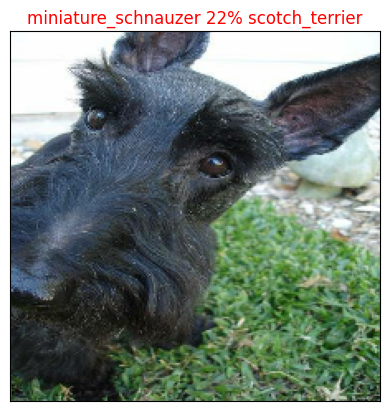

In [78]:
plot_pred(predictions,
          val_labels,
          val_images,
          n=1)

In [83]:
def plot_pred_conf(prediction_probabilites, labels, n=1):
  pred_prob, true_label = prediction_probabilites[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_values = pred_prob[top_10_pred_indexes]

  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")


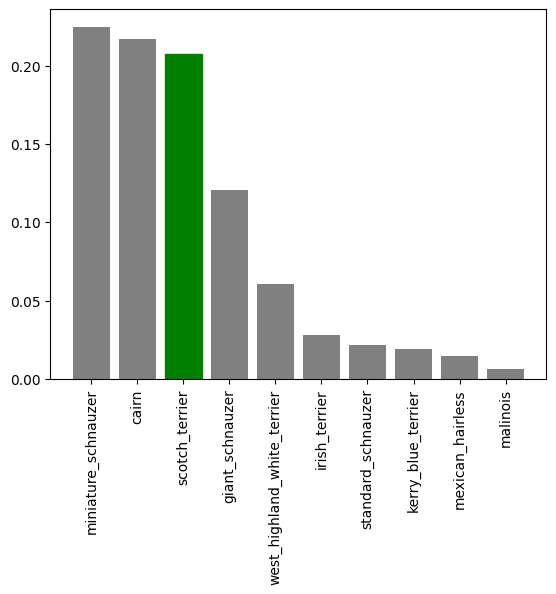

In [86]:
plot_pred_conf(predictions,val_labels,n=1)

In [87]:
model.save('/content/drive/MyDrive/Dog Vision/dog-vision-model.h5')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
savedmodel = tf.keras.models.load_model('/content/drive/MyDrive/Dog Vision/dog-vision-model.h5',
                                        custom_objects={"KerasLayer":hub.KerasLayer})
savedmodel.summary()
model = savedmodel

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


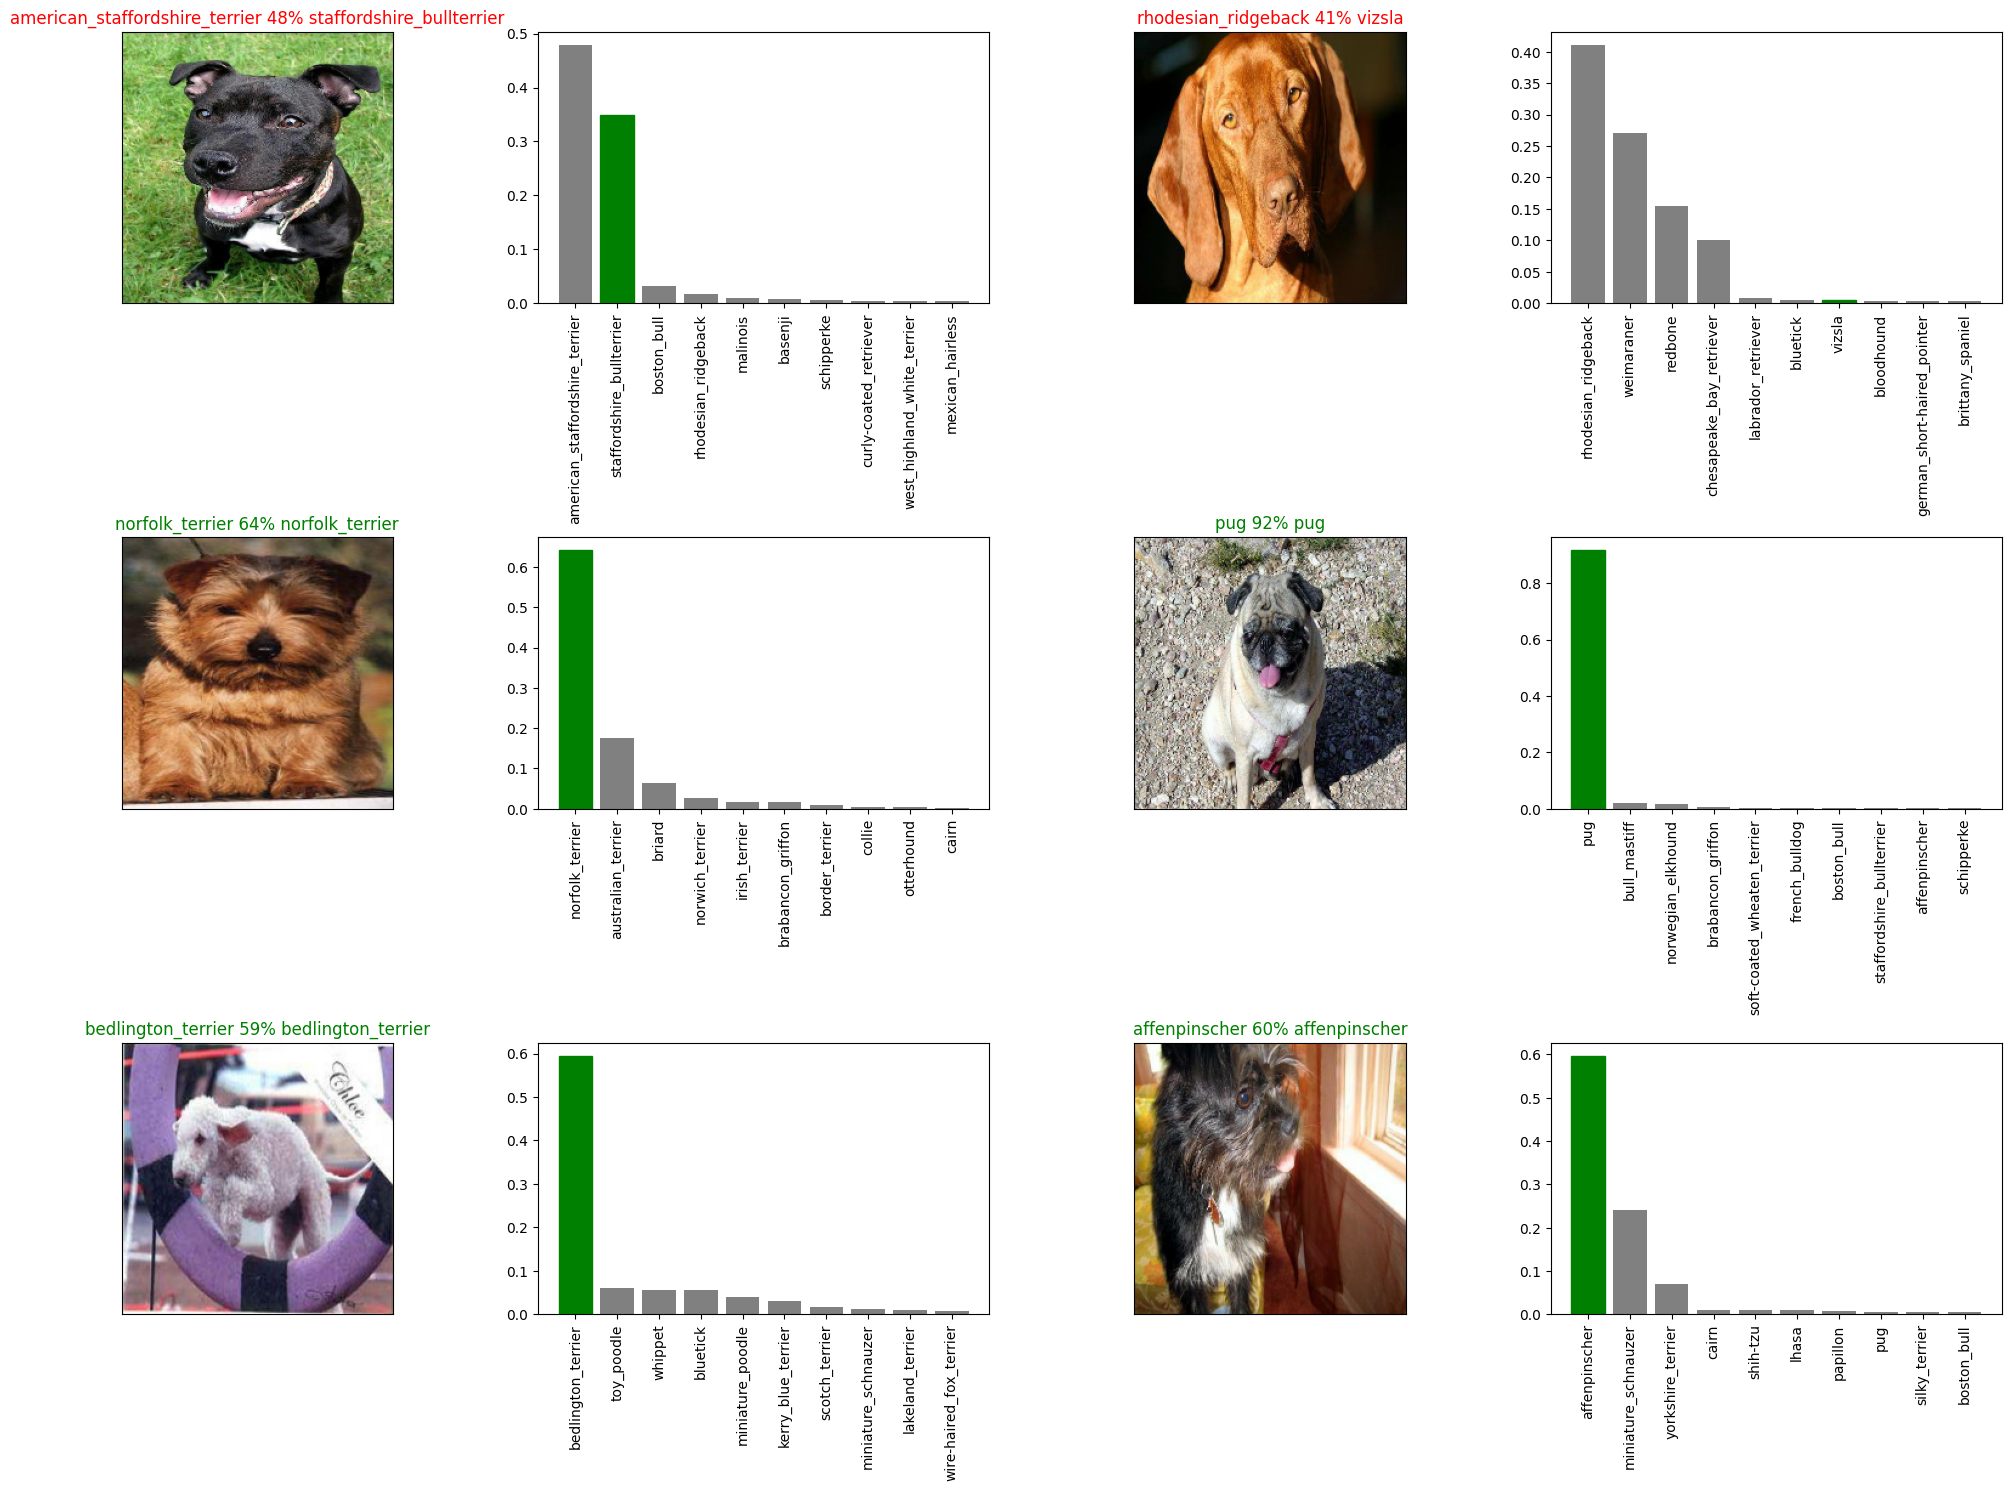

In [91]:
i_multiplier = 50
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions,
            val_labels,
            val_images,
            i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions,
                val_labels,
                i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Training a big dog model on full data

In [92]:
full_data = create_data_batches(X, y)

In [93]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [94]:
# Create 
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [95]:
# Running cell will take a while

In [96]:
full_model.fit(full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 2250s 7s/step - loss: 1.3102 - accuracy: 0.6739
Epoch 2/100
320/320 [==============================] - 36s 112ms/step - loss: 0.3955 - accuracy: 0.8824
Epoch 3/100
320/320 [==============================] - 33s 104ms/step - loss: 0.2358 - accuracy: 0.9364
Epoch 4/100
320/320 [==============================] - 32s 101ms/step - loss: 0.1526 - accuracy: 0.9628
Epoch 5/100
320/320 [==============================] - 34s 107ms/step - loss: 0.1057 - accuracy: 0.9780
Epoch 6/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0779 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0580 - accuracy: 0.9913
Epoch 8/100
320/320 [==============================] - 34s 106ms/step - loss: 0.0468 - accuracy: 0.9939
Epoch 9/100
320/320 [==============================] - 33s 102ms/step - loss: 0.0388 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 34s 105ms

In [98]:
full_model.save('/content/drive/MyDrive/Dog Vision/dog-vision-full-model.h5')


In [99]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "/content/drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/drive/MyDrive/Dog Vision/test/dfc9bcbafc1e249cd07a25c8f50384e0.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e35b90290702042d17ceee2aaf2d1475.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e48f3d4f0514a07f4777a30f01d32ea9.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e5fa615e36dc3b2b3f554aa5097a6ece.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e732916519751eaa0cb2ba0cc1217ab9.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e0c767bc2bc03b909526f1861c712b13.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 '/content/drive/MyDrive/Dog Vision/test/dfe02d52ca281aaca6215a42fee6245c.jpg',
 '/content/drive/MyDrive/Dog Vision/test/dd3ac0ab0e9328f1f4c1692947c17c09.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e4b7ff61849485992246c0f2ab7e8804.jpg']

In [100]:
test_data = create_data_batches(test_filenames, test_data=True)

In [102]:
full_model.evaluate(val_data)

7/7 [==============================] - 1s 94ms/step - loss: 0.0063 - accuracy: 1.0000


[0.006270451005548239, 1.0]

In [104]:
predictions = full_model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 145ms/step


array([[2.11056658e-07, 7.94477906e-09, 5.06867707e-07, ...,
        5.13632017e-07, 9.74235714e-09, 2.83786150e-08],
       [8.77437623e-10, 2.98289251e-08, 9.20681885e-07, ...,
        1.62021223e-08, 1.13279555e-07, 6.88723134e-10],
       [8.58266044e-15, 1.10864329e-09, 8.24497415e-11, ...,
        1.15709342e-09, 6.43300080e-10, 1.03081946e-10],
       ...,
       [2.50301844e-14, 4.28657934e-12, 5.15473775e-12, ...,
        4.17953866e-13, 4.19142387e-10, 9.09664444e-12],
       [1.39222948e-06, 1.11628244e-08, 1.29738197e-07, ...,
        3.54575249e-08, 3.65208120e-06, 4.69197985e-05],
       [4.88003082e-10, 1.03454246e-12, 5.56490987e-09, ...,
        1.13146723e-06, 1.46316932e-08, 7.45418172e-11]], dtype=float32)

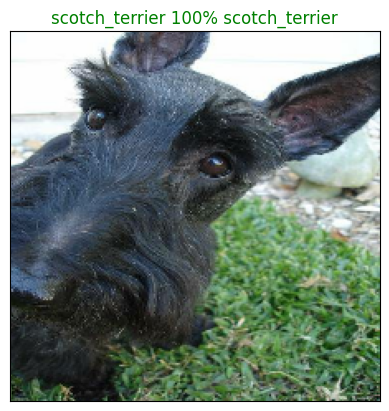

In [105]:
plot_pred(predictions,
          val_labels,
          val_images,
          n=1)

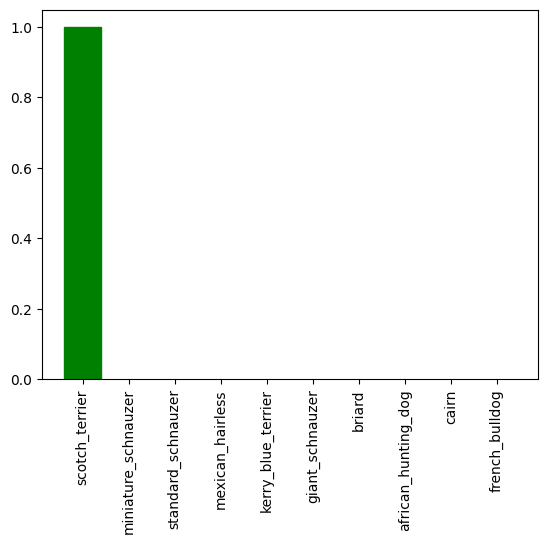

In [106]:
plot_pred_conf(predictions,val_labels,n=1)


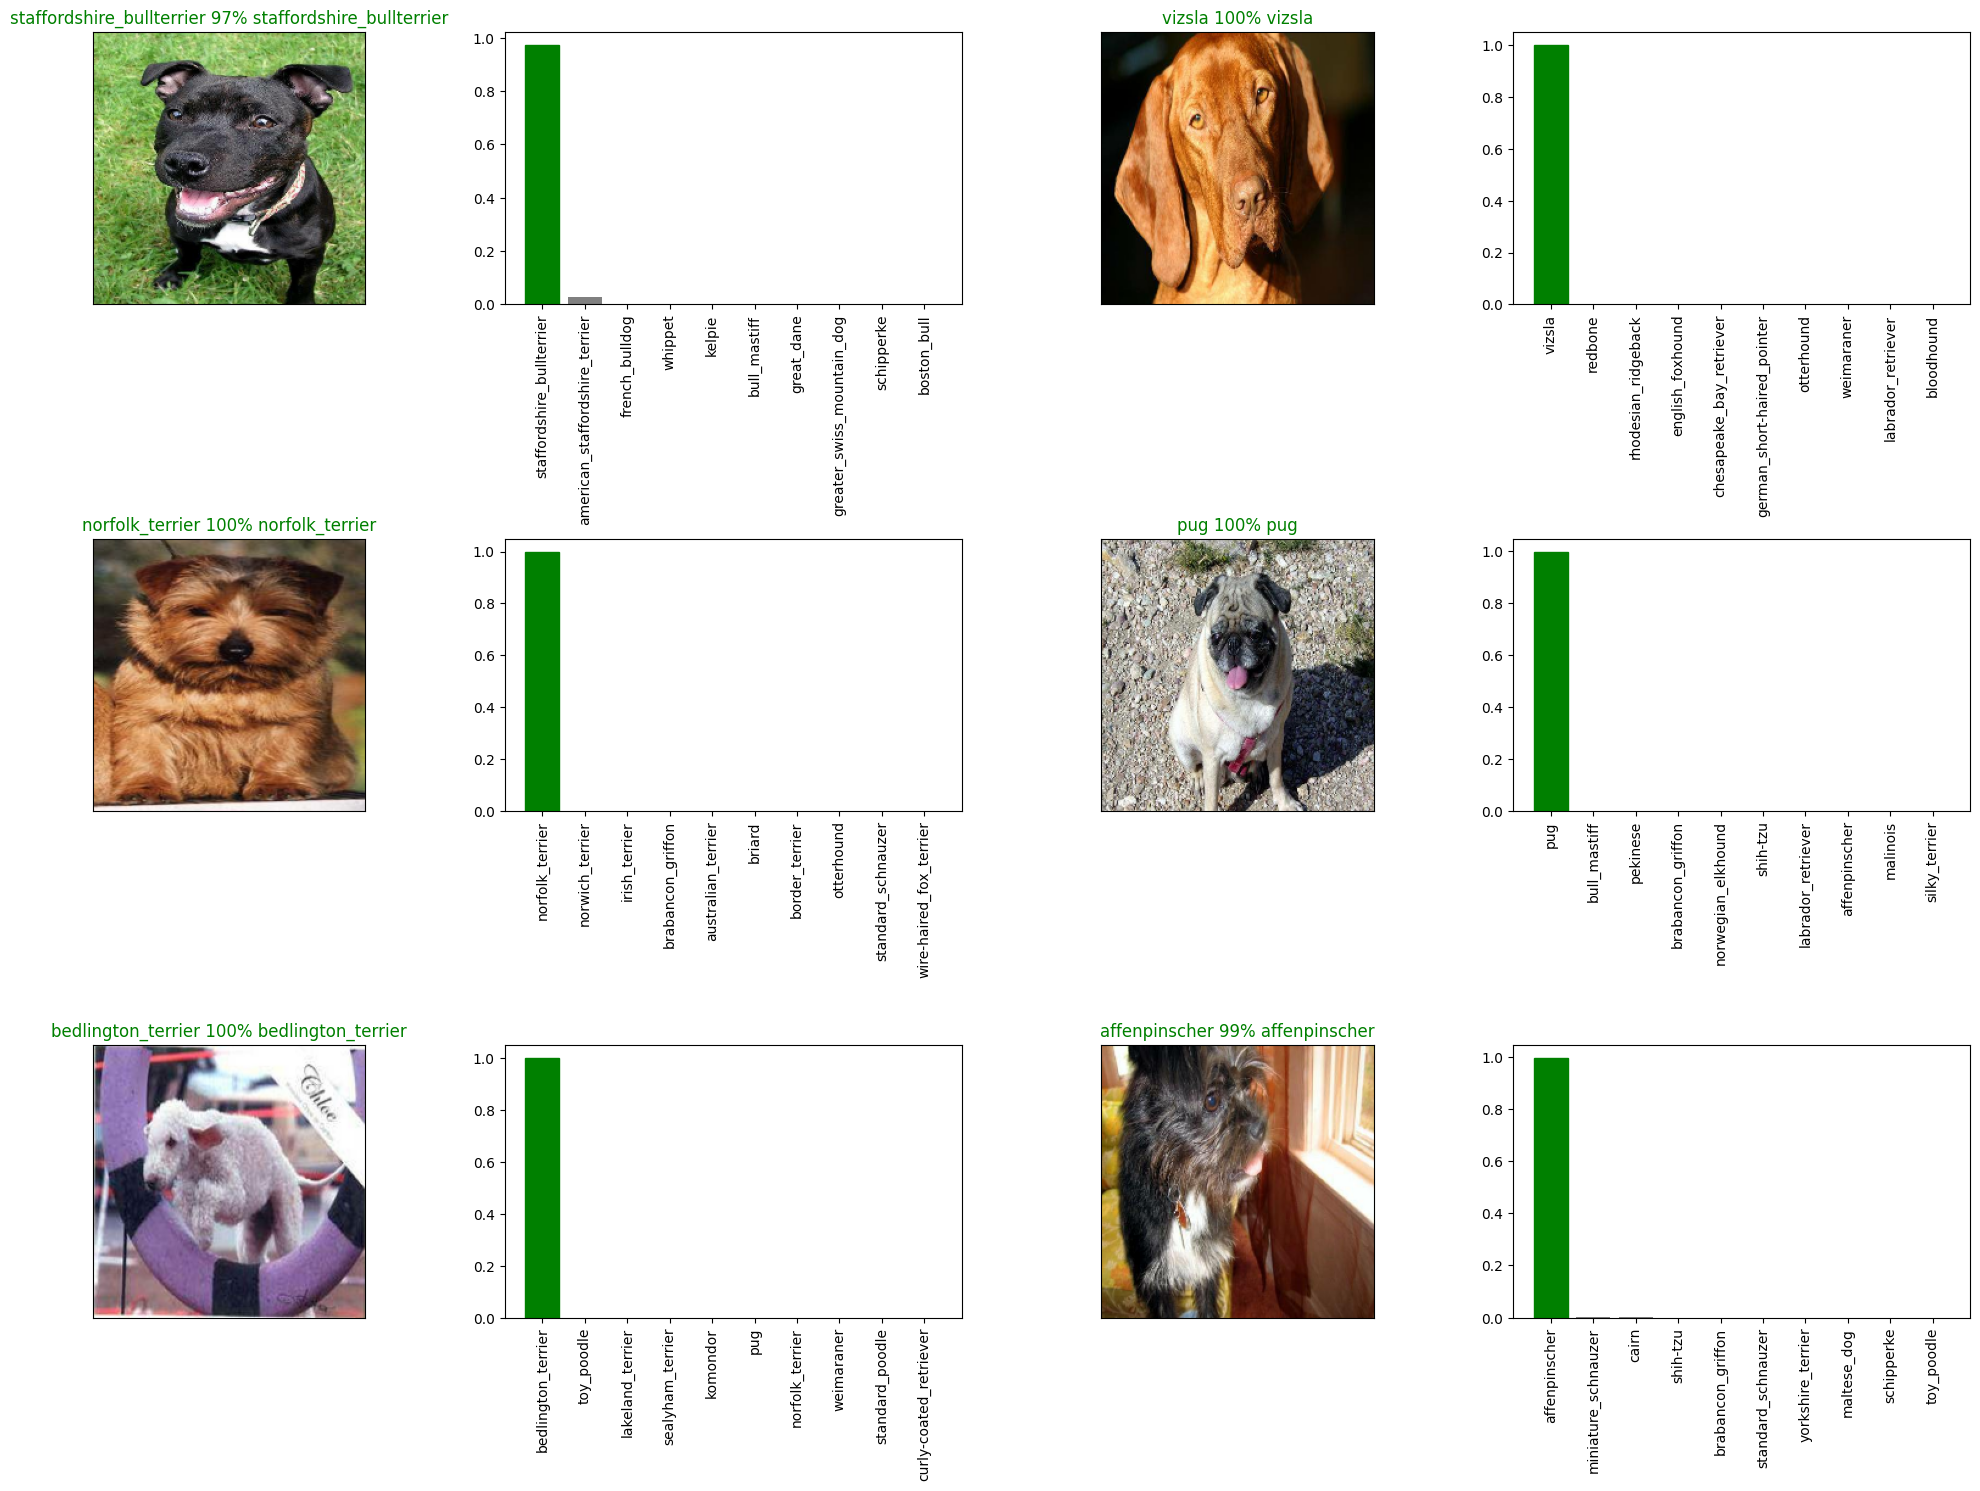

In [107]:
i_multiplier = 50
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions,
            val_labels,
            val_images,
            i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions,
                val_labels,
                i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()